In [1]:
import time
import numpy as np
import types
import os
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.special import zeta
import PRyM.PRyM_init as PRyMini
import PRyM.PRyM_thermo as PRyMthermo
import PRyM.test_main3 as test_main
#import PRyM.PRyM_jl_sys as PRyMjl
from numdifftools import Derivative
import PRyM.PRyM_eval_nTOp as PRyMevalnTOp
import PRyM.PRyM_nTOp as PRyMnTOp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#creates plots that Tim is looking for

PRyMini.compute_bckg_flag = True
PRyMini.save_bckg_flag = False
PRyMini.stasis_flag = True
PRyMini.verbose_flag = False

Tends = np.logspace(-3,1,200)



# Optional: write header only once
with open("results.txt", "w") as f:
    f.write("Tend Neff Omeganurel 1/Omeganunr YPCMB YPBBN DoHx1e5 He3oHx1e5 Li7oHx1e10\n")

for T in Tends:
    PRyMini.stasis_params['stasis_end_mev'] = T
    results = test_main.PRyMclass().PRyMresults()
    Neff_f, Omeganurel_f, OneOverOmeganunr_f, YPCMB_f, YPBBN_f, DoHx1e5_f, He3oHx1e5_f, Li7oHx1e10_f = results

    #Save this result immediately
    with open("results.txt", "a") as f:
        f.write(f"{T:.6g} {Neff_f:.6g} {Omeganurel_f:.6g} {OneOverOmeganunr_f:.6g} "
                f"{YPCMB_f:.6g} {YPBBN_f:.6g} {DoHx1e5_f:.6g} {He3oHx1e5_f:.6g} {Li7oHx1e10_f:.6g}\n")

KeyboardInterrupt: 

In [3]:
#to import data
columns = [
    "Tend", "Neff", "Omeganurel", "OneOverOmeganunr",
    "YPCMB", "YPBBN", "DoHx1e5", "He3oHx1e5", "Li7oHx1e10"
]

# Read the space-separated file
df = pd.read_csv("results0.txt", delim_whitespace=True, comment="#", names=columns, skiprows=1)

/tmp/ipykernel_1875489/1224456238.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("results0.txt", delim_whitespace=True, comment="#", names=columns, skiprows=1)


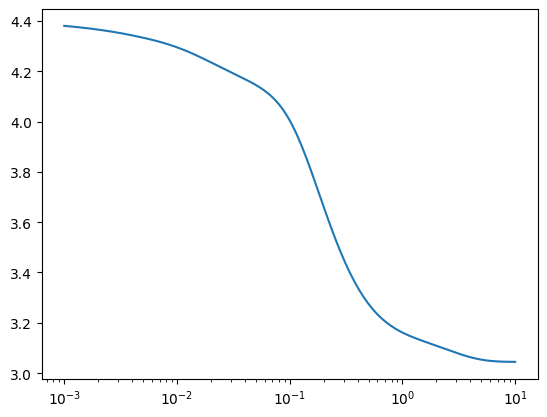

In [4]:
Tend = df['Tend'].tolist()
Neff = df['Neff'].tolist()
plt.plot(Tend,Neff)
plt.xscale('log')